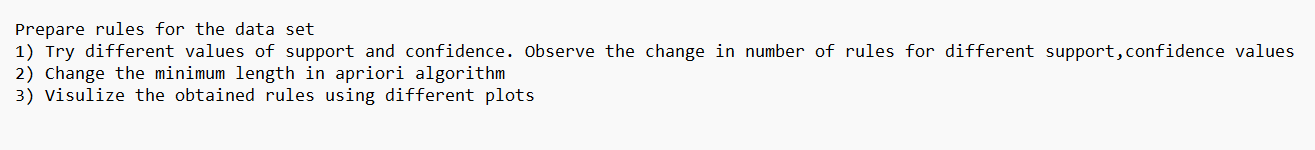

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.shape

(2000, 11)

In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
book.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


In [9]:
# Checking Null Values

book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Apriori Algorithm 

### Preparing data according to Apriori Algorithm Expectation

### 2% Support, 20% Confidence

In [10]:
frequent_item_sets_1 = apriori(df=book, min_support = 0.02, use_colnames=True, max_len=6) #Frequent itemsets
frequent_item_sets_1

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ArtBks, CookBks, RefBks, ..."
272,0.0270,"(YouthBks, DoItYBks, CookBks, GeogBks, RefBks,..."
273,0.0310,"(YouthBks, DoItYBks, ArtBks, CookBks, GeogBks,..."
274,0.0225,"(YouthBks, ArtBks, CookBks, GeogBks, RefBks, C..."


In [11]:
rules1 = association_rules(df = frequent_item_sets_1 , metric='confidence', min_threshold=0.20,)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
2348,"(RefBks, CookBks, GeogBks)","(ArtBks, DoItYBks, ChildBks)",0.0890,0.0950,0.024,0.269663,2.838557,0.015545,1.239154
2349,"(RefBks, ChildBks, GeogBks)","(CookBks, ArtBks, DoItYBks)",0.0940,0.1015,0.024,0.255319,2.515460,0.014459,1.206557
2350,"(RefBks, DoItYBks)","(ArtBks, CookBks, ChildBks, GeogBks)",0.1055,0.0835,0.024,0.227488,2.724409,0.015191,1.186390
2351,"(ArtBks, RefBks)","(CookBks, DoItYBks, ChildBks, GeogBks)",0.0895,0.0890,0.024,0.268156,3.012994,0.016035,1.244802


### Visualizing obtained rule1

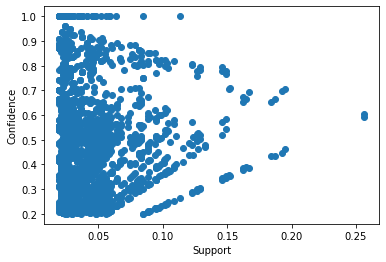

In [12]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 2% Support, 40% Confidence

In [13]:
frequent_item_sets_2 = apriori(df = book, min_support=0.02, use_colnames=True, max_len=6) #Frequent itemsets
frequent_item_sets_2 

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(YouthBks, DoItYBks, ArtBks, CookBks, RefBks, ..."
272,0.0270,"(YouthBks, DoItYBks, CookBks, GeogBks, RefBks,..."
273,0.0310,"(YouthBks, DoItYBks, ArtBks, CookBks, GeogBks,..."
274,0.0225,"(YouthBks, ArtBks, CookBks, GeogBks, RefBks, C..."


In [14]:
rules2 = association_rules(df = frequent_item_sets_2 , metric='confidence', min_threshold=0.40,)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1371,"(ArtBks, RefBks, CookBks, GeogBks)","(DoItYBks, ChildBks)",0.0460,0.1840,0.024,0.521739,2.835539,0.015536,1.706182
1372,"(ArtBks, RefBks, ChildBks, GeogBks)","(CookBks, DoItYBks)",0.0495,0.1875,0.024,0.484848,2.585859,0.014719,1.577206
1373,"(ArtBks, RefBks, DoItYBks)","(CookBks, ChildBks, GeogBks)",0.0535,0.1495,0.024,0.448598,3.000656,0.016002,1.542432
1374,"(RefBks, DoItYBks, GeogBks)","(ArtBks, CookBks, ChildBks)",0.0585,0.1265,0.024,0.410256,3.243134,0.016600,1.481152


### Visualizing obtained rule2

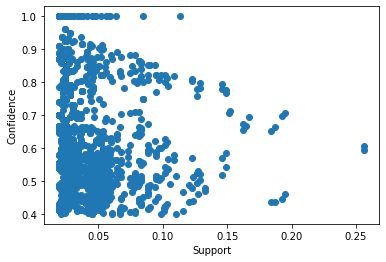

In [15]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 4% Support, 50% Confidence

In [16]:
frequent_item_sets_3 = apriori(df =book ,min_support=0.04, use_colnames=True, max_len=5) #Frequent itemsets
frequent_item_sets_3

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(YouthBks, CookBks, GeogBks, RefBks, ChildBks)"
129,0.0465,"(YouthBks, ArtBks, CookBks, GeogBks, ChildBks)"
130,0.0450,"(DoItYBks, CookBks, GeogBks, RefBks, ChildBks)"
131,0.0535,"(DoItYBks, ArtBks, CookBks, GeogBks, ChildBks)"


In [17]:
rules3=association_rules(df = frequent_item_sets_3 ,metric='confidence',min_threshold=0.50,)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
367,"(ArtBks, RefBks, ChildBks, GeogBks)",(CookBks),0.0495,0.4310,0.0405,0.818182,1.898334,0.019166,3.129500
368,"(RefBks, CookBks, ChildBks, GeogBks)",(ArtBks),0.0785,0.2410,0.0405,0.515924,2.140762,0.021582,1.567934
369,"(ArtBks, RefBks, CookBks)","(ChildBks, GeogBks)",0.0700,0.1950,0.0405,0.578571,2.967033,0.026850,1.910169
370,"(ArtBks, RefBks, GeogBks)","(CookBks, ChildBks)",0.0565,0.2560,0.0405,0.716814,2.800055,0.026036,2.627250


### Visualizing obtained rule3

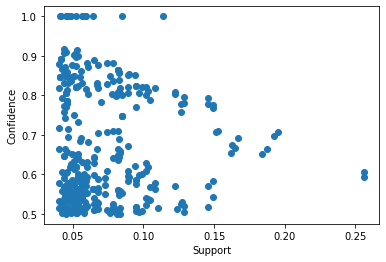

In [18]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 7% Support, 50% Confidence

In [19]:
frequent_item_sets_4 = apriori(df =book ,min_support=0.07, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_4

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(DoItYBks, RefBks, CookBks, ChildBks)"
62,0.0820,"(ArtBks, DoItYBks, CookBks, ChildBks)"
63,0.0890,"(DoItYBks, CookBks, ChildBks, GeogBks)"
64,0.0785,"(RefBks, CookBks, ChildBks, GeogBks)"


In [20]:
rules4 = association_rules(df = frequent_item_sets_4 , metric='confidence', min_threshold=0.50,)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
128,"(ArtBks, ChildBks, GeogBks)",(CookBks),0.1020,0.4310,0.0835,0.818627,1.899368,0.039538,3.137189
129,"(CookBks, ChildBks, GeogBks)",(ArtBks),0.1495,0.2410,0.0835,0.558528,2.317545,0.047471,1.719250
130,"(ArtBks, CookBks)","(ChildBks, GeogBks)",0.1670,0.1950,0.0835,0.500000,2.564103,0.050935,1.610000
131,"(ArtBks, ChildBks)","(CookBks, GeogBks)",0.1625,0.1925,0.0835,0.513846,2.669331,0.052219,1.660997


### Visualizing obtained rule4

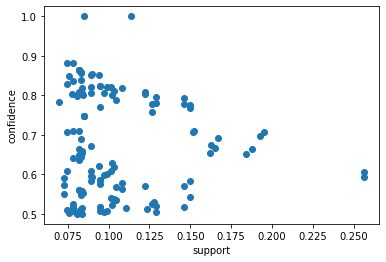

In [21]:
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 10% Support, 80% Confidence

In [22]:
frequent_item_sets_5 = apriori(df =book ,min_support=0.10, use_colnames=True, max_len=5) #Frequent itemsets
frequent_item_sets_5

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [23]:
rules5 = association_rules(df = frequent_item_sets_1 ,metric='confidence', min_threshold=0.90)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
115,"(ItalCook, ItalArt, GeogBks)","(ArtBks, CookBks)",0.0240,0.1670,0.0240,1.000000,5.988024,0.019992,inf
116,"(ItalArt, CookBks, GeogBks)","(ItalCook, ArtBks)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.5875
117,"(YouthBks, DoItYBks, CookBks, GeogBks, RefBks)",(ChildBks),0.0290,0.4230,0.0270,0.931034,2.201027,0.014733,8.3665
118,"(YouthBks, DoItYBks, GeogBks, RefBks, ChildBks)",(CookBks),0.0300,0.4310,0.0270,0.900000,2.088167,0.014070,5.6900


### Visualizing obtained rule5

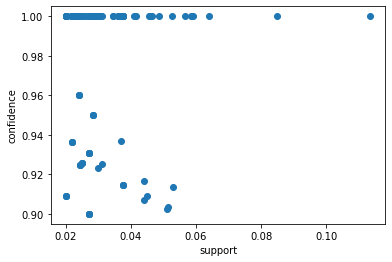

In [24]:
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

### 7% Support, 90% Confidence

In [25]:
frequent_item_sets_6 = apriori(df =book ,min_support=0.07, use_colnames=True, max_len=4) #Frequent itemsets
frequent_item_sets_6

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0745,"(DoItYBks, RefBks, CookBks, ChildBks)"
62,0.0820,"(ArtBks, DoItYBks, CookBks, ChildBks)"
63,0.0890,"(DoItYBks, CookBks, ChildBks, GeogBks)"
64,0.0785,"(RefBks, CookBks, ChildBks, GeogBks)"


In [26]:
rules6=association_rules(df = frequent_item_sets_6 ,metric='confidence',min_threshold=0.90,)
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf


### Visualizing obtained rule6

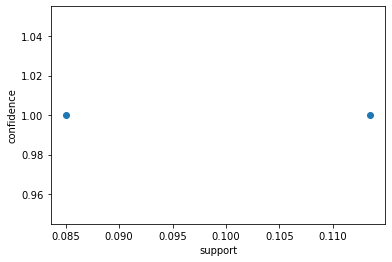

In [27]:
plt.scatter(rules6['support'],rules6['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [28]:
### 2% Support, 20% Confidence

In [29]:
frequent_item_sets_7 = apriori(df =book ,min_support=0.02, use_colnames=True,max_len=2) #Frequent itemsets
frequent_item_sets_7

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.0370,(ItalAtlas)
9,0.0485,(ItalArt)


In [30]:
rules7 = association_rules(df = frequent_item_sets_7 , metric='confidence', min_threshold=0.20,)
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
75,(Florence),(GeogBks),0.1085,0.2760,0.0425,0.391705,1.419221,0.012554,1.190212
76,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
77,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
78,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990


So From Above 7 cases we observed that,

1) Lower the Confidence level Higher the no. of rules and vice-versa.

2) Higher the Support, lower the no. of rules.

3) Higher the max length , higher the no.of rules.

So, we can conclude that these 3 parameters different combinations can generate different rules.